In [1]:
# uncomment to show results in a window
# %matplotlib tk
import cv2
import glob
import copy
import numpy as np
import math
import scipy.misc as scpm
import matplotlib.pyplot as plt
import imageio

In [2]:
# Función para cargar las imágenes dados los nombres
def load_images(filenames):
    """Load multiple images."""
    images = []
    for image in filenames:
        img = imageio.imread(image)
        images.append(img)
    return np.array(images)

In [3]:
def mostrar_imagenes(imgs, cmap='viridis'):
    plt.figure(figsize=(12,6))
    for i in range(len(imgs)):
        plt.subplot(2,3,i+1)
        plt.imshow(imgs[i], cmap=cmap)

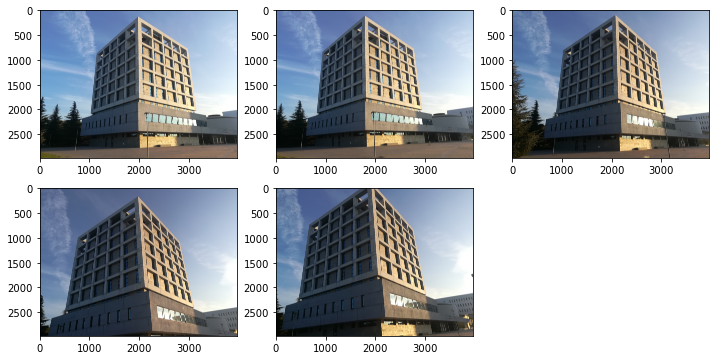

In [4]:
building = glob.glob("building/*.jpg")
building = load_images(building)

mostrar_imagenes(building)

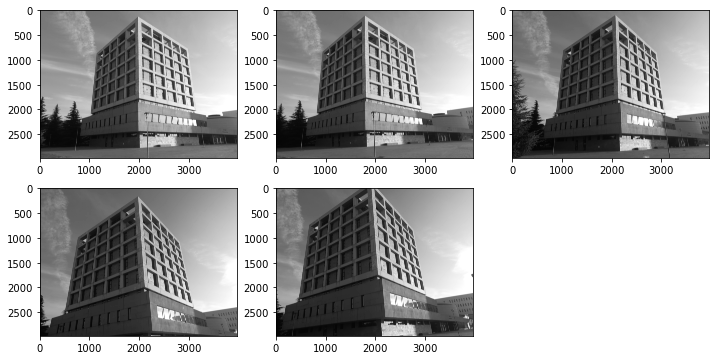

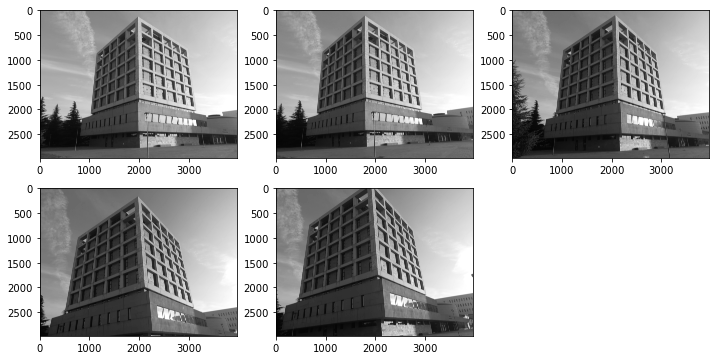

In [5]:
gris_from_rgb = []
for img in building:
    gris_from_rgb.append(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))
mostrar_imagenes(gris_from_rgb, cmap='gray')

gris_from_bgr = []
for img in building:
    gris_from_bgr.append(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
mostrar_imagenes(gris_from_bgr, cmap='gray')

In [6]:
def aplicar_hough(gris):
    canny = []
    img_lines = []
    img_linesP = []
    
    for src in gris:
        dst = cv2.Canny(src, 50, 200, None, 3)
        canny.append(dst)

        cdst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)
        cdstP = np.copy(cdst)

        lines = cv2.HoughLines(dst, 1, np.pi / 180, 400, None, 0, 0)
        if lines is not None:
            for i in range(0, len(lines)):
                rho = lines[i][0][0]
                theta = lines[i][0][1]
                a = math.cos(theta)
                b = math.sin(theta)
                x0 = a * rho
                y0 = b * rho
                pt1 = (int(x0 + 10000*(-b)), int(y0 + 10000*(a)))
                pt2 = (int(x0 - 10000*(-b)), int(y0 - 10000*(a)))
                cv2.line(cdst, pt1, pt2, (255,0,0), 3, cv2.LINE_AA)
        img_lines.append(cdst)

        linesP = cv2.HoughLinesP(dst, 1, np.pi / 180, 400, None, 50, 10)
        if linesP is not None:
            for i in range(0, len(linesP)):
                l = linesP[i][0]
                cv2.line(cdstP, (l[0], l[1]), (l[2], l[3]), (255,0,0), 3, cv2.LINE_AA)
        img_linesP.append(cdstP)
        
    return canny, img_lines, img_linesP

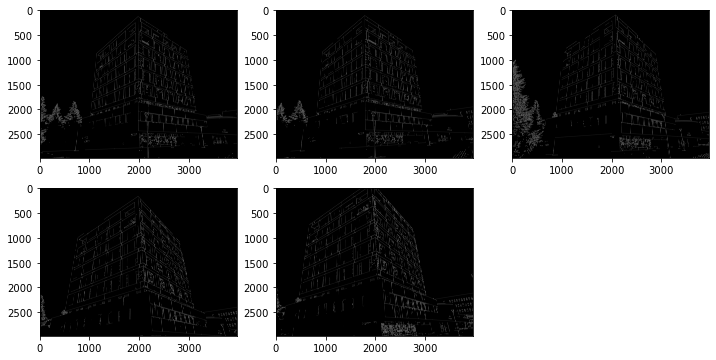

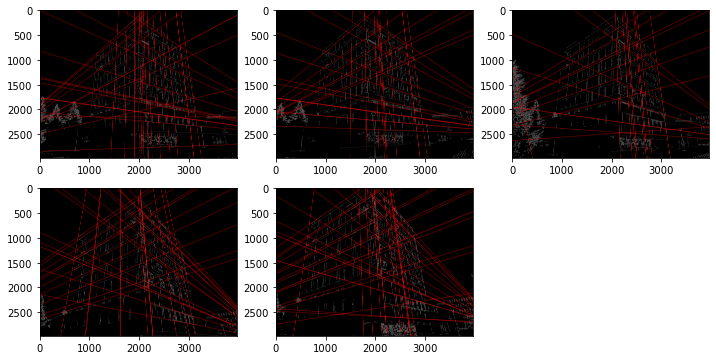

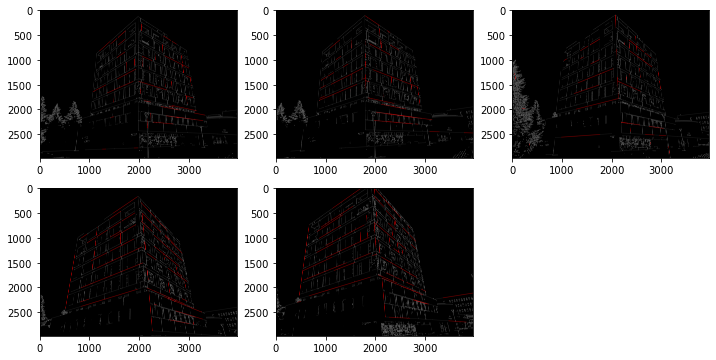

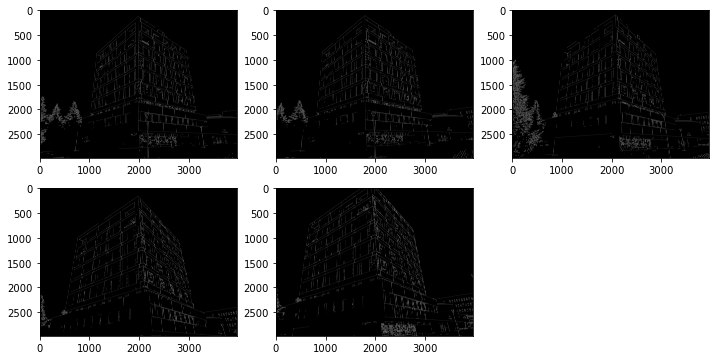

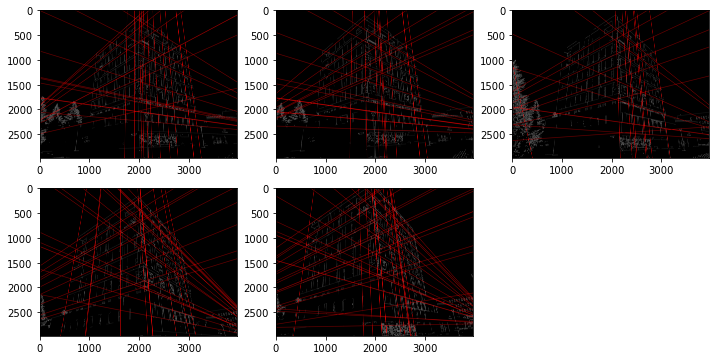

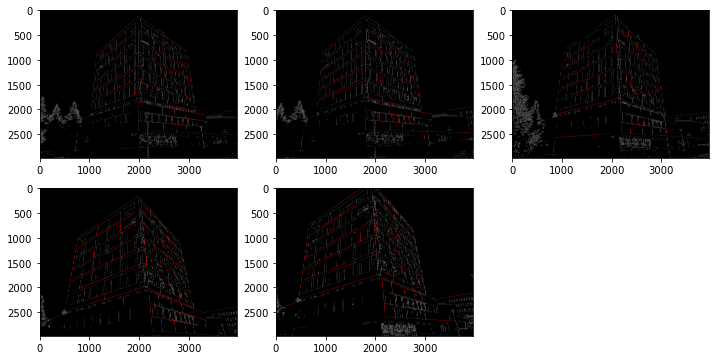

In [7]:
canny_rgb, lines_rgb, linesP_rgb = aplicar_hough(gris_from_rgb)
mostrar_imagenes(canny_rgb, cmap='gray')
mostrar_imagenes(lines_rgb)
mostrar_imagenes(linesP_rgb)

canny_bgr, lines_bgr, linesP_bgr = aplicar_hough(gris_from_bgr)
mostrar_imagenes(canny_bgr, cmap='gray')
mostrar_imagenes(lines_bgr)
mostrar_imagenes(linesP_bgr)